In [1]:
print("QSAR notebook is working")  

QSAR notebook is working


In [2]:
import sys
sys.version


'3.12.12 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 20:05:38) [MSC v.1929 64 bit (AMD64)]'

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

print("All core libraries imported successfully")


All core libraries imported successfully


In [4]:
import pandas as pd
import numpy as np


In [7]:
!dir


 Volume in drive C has no label.
 Volume Serial Number is 9C50-1FBD

 Directory of C:\Users\hp\Desktop\QSAR_PROJECT\qsar_env

12/23/2025  05:43 AM    <DIR>          .
12/23/2025  05:41 AM    <DIR>          ..
12/21/2025  04:42 PM                71 .gitignore
12/23/2025  05:11 AM    <DIR>          .ipynb_checkpoints
12/21/2025  04:42 PM    <DIR>          Include
12/21/2025  04:42 PM    <DIR>          Lib
12/21/2025  04:42 PM               317 pyvenv.cfg
12/23/2025  05:43 AM            23,024 QSAR_ER_Activity_Model.ipynb
12/21/2025  04:54 PM    <DIR>          Scripts
12/21/2025  04:54 PM    <DIR>          share
               3 File(s)         23,412 bytes
               7 Dir(s)  168,651,780,096 bytes free


In [8]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 9C50-1FBD

 Directory of C:\Users\hp\Desktop\QSAR_PROJECT\qsar_env

12/23/2025  05:47 AM    <DIR>          .
12/23/2025  05:50 AM    <DIR>          ..
12/21/2025  04:42 PM                71 .gitignore
12/23/2025  05:11 AM    <DIR>          .ipynb_checkpoints
12/21/2025  04:42 PM    <DIR>          Include
12/21/2025  04:42 PM    <DIR>          Lib
12/21/2025  04:42 PM               317 pyvenv.cfg
12/23/2025  05:47 AM            24,198 QSAR_ER_Activity_Model.ipynb
12/21/2025  04:54 PM    <DIR>          Scripts
12/21/2025  04:54 PM    <DIR>          share
               3 File(s)         24,586 bytes
               7 Dir(s)  168,650,268,672 bytes free


In [9]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 9C50-1FBD

 Directory of C:\Users\hp\Desktop\QSAR_PROJECT\qsar_env

12/23/2025  06:01 AM    <DIR>          .
12/23/2025  06:01 AM    <DIR>          ..
12/21/2025  04:42 PM                71 .gitignore
12/23/2025  05:11 AM    <DIR>          .ipynb_checkpoints
12/23/2025  05:50 AM             8,125 data.csv
12/21/2025  04:42 PM    <DIR>          Include
12/21/2025  04:42 PM    <DIR>          Lib
12/21/2025  04:42 PM               317 pyvenv.cfg
12/23/2025  05:51 AM            25,370 QSAR_ER_Activity_Model.ipynb
12/21/2025  04:54 PM    <DIR>          Scripts
12/21/2025  04:54 PM    <DIR>          share
               4 File(s)         33,883 bytes
               7 Dir(s)  168,649,576,448 bytes free


In [10]:
df = pd.read_csv("data.csv")

In [11]:
df.head()


,activity,smiles
0,1,CC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@...
1,0,CCCc1c(OCCCOc2ccc(OCC(=O)O)cc2)ccc(C(C)=O)c1O
2,0,C=C(C)C(=O)OCC(O)COc1ccc(C(C)(C)c2ccc(OCC(O)CO...
3,0,C=C(C)CS(=O)(=O)[O-]
4,1,Cc1ccc2c(c1N)C(=O)c1ccccc1C2=O


In [12]:
df.columns


Index(['activity', 'smiles'], dtype='object')

In [13]:
df['activity'].value_counts()


activity
0    114
1     85
Name: count, dtype: int64

In [14]:
df = df[['smiles', 'activity']].dropna()
df.shape


(199, 2)

In [15]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import ConvertToNumpyArray
import numpy as np


In [16]:
def mol_to_fp(smiles, radius=2, nBits=1024):
    """
    Convert a SMILES string to a Morgan fingerprint (ECFP) as a NumPy array.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return np.zeros(nBits)  # handle invalid SMILES
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
    arr = np.zeros((nBits,), dtype=int)
    ConvertToNumpyArray(fp, arr)
    return arr


In [17]:
# Generate fingerprints for all SMILES
X = np.array([mol_to_fp(smi) for smi in df['smiles']])

# Target labels
y = df['activity'].values

# Check shapes
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (199, 1024)
Target vector shape: (199,)


[07:37:10] DEPRECATION WARNING: please use MorganGenerator
[07:37:10] DEPRECATION WARNING: please use MorganGenerator
[07:37:10] DEPRECATION WARNING: please use MorganGenerator
[07:37:10] DEPRECATION WARNING: please use MorganGenerator
[07:37:10] DEPRECATION WARNING: please use MorganGenerator
[07:37:10] DEPRECATION WARNING: please use MorganGenerator
[07:37:10] DEPRECATION WARNING: please use MorganGenerator
[07:37:10] DEPRECATION WARNING: please use MorganGenerator
[07:37:10] DEPRECATION WARNING: please use MorganGenerator
[07:37:10] DEPRECATION WARNING: please use MorganGenerator
[07:37:10] DEPRECATION WARNING: please use MorganGenerator
[07:37:10] DEPRECATION WARNING: please use MorganGenerator
[07:37:10] DEPRECATION WARNING: please use MorganGenerator
[07:37:10] DEPRECATION WARNING: please use MorganGenerator
[07:37:10] DEPRECATION WARNING: please use MorganGenerator
[07:37:10] DEPRECATION WARNING: please use MorganGenerator
[07:37:10] DEPRECATION WARNING: please use MorganGenerat

In [18]:
print(X[0])  # prints first compound's 1024-bit fingerprint


[0 0 0 ... 0 0 0]


In [19]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# Stratified split to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (159, 1024)
Test size: (40, 1024)


In [21]:
clf = RandomForestClassifier(n_estimators=199, random_state=42)
clf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",199
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [22]:
# Probabilities for ROC
y_proba = clf.predict_proba(X_test)[:,1]
y_pred = clf.predict(X_test)

# Metrics
auc = roc_auc_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("ROC-AUC:", auc)
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)


ROC-AUC: 0.7800511508951407
Accuracy: 0.825
Confusion Matrix:
 [[22  1]
 [ 6 11]]


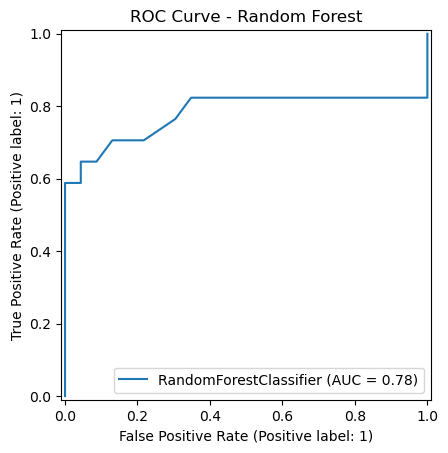

In [23]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()


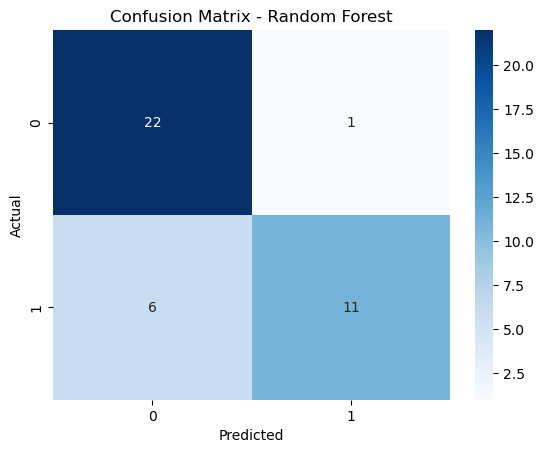

In [24]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [25]:
importances = clf.feature_importances_
top_indices = np.argsort(importances)[-10:][::-1]  # top 10

print("Top 10 important fingerprint bits:", top_indices)
print("Importance scores:", importances[top_indices])


Top 10 important fingerprint bits: [745 289 408 807 578 754 714 157 455 673]
Importance scores: [0.03378535 0.02529392 0.02112928 0.01830576 0.01649583 0.01344439
 0.01331026 0.0111292  0.01050856 0.00938155]


In [28]:
from sklearn.ensemble import RandomForestClassifier

y = df['activity'].values
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X, y)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [29]:
import numpy as np

importances = clf.feature_importances_
top_indices = np.argsort(importances)[-5:][::-1]  # top 5 important bits
print("Top fingerprint bits:", top_indices)


Top fingerprint bits: [289 578 745 408 807]


In [31]:
# Required imports
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, rdMolDescriptors
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
from sklearn.ensemble import RandomForestClassifier

# -------------------------
# 1️⃣ Load your dataset
# -------------------------
df = pd.read_csv("data.csv")  # ensure your CSV is in the same folder
print("Dataset shape:", df.shape)
print(df.head())

# -------------------------
# 2️⃣ Generate fingerprints with bit_info
# -------------------------
bit_info = {}  # store atom/radius info
X = []

for smi in df['smiles']:
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        arr = np.zeros(1024)
    else:
        fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(
            mol, radius=2, nBits=1024, bitInfo=bit_info
        )
        arr = np.zeros(1024, dtype=int)
        ConvertToNumpyArray(fp, arr)
    X.append(arr)
X = np.array(X)

y = df['activity'].values
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# -------------------------
# 3️⃣ Train Random Forest
# -------------------------
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X, y)

# -------------------------
# 4️⃣ Identify top fingerprint bits
# -------------------------
importances = clf.feature_importances_
top_indices = np.argsort(importances)[-5:][::-1]  # top 5 bits
print("Top fingerprint bits:", top_indices)

# -------------------------
# 5️⃣ Map top bits to substructures & display
# -------------------------
for bit in top_indices:
    print(f"\n=== Bit {bit} ===")
    if bit in bit_info:
        for mol_idx, (atom_idx, radius) in enumerate(bit_info[bit]):
            mol = Chem.MolFromSmiles(df['smiles'][mol_idx])
            if mol is None:
                continue
            print(f"Molecule {mol_idx} - Atom {atom_idx}, Radius {radius}")
            img = Draw.MolToImage(mol, highlightAtoms=[atom_idx], size=(300,300))
            display(img)
    else:
        print("Bit not found in any molecule")


Dataset shape: (199, 2)
   activity                                             smiles
0         1  CC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@...
1         0      CCCc1c(OCCCOc2ccc(OCC(=O)O)cc2)ccc(C(C)=O)c1O
2         0  C=C(C)C(=O)OCC(O)COc1ccc(C(C)(C)c2ccc(OCC(O)CO...
3         0                               C=C(C)CS(=O)(=O)[O-]
4         1                     Cc1ccc2c(c1N)C(=O)c1ccccc1C2=O
Feature matrix shape: (199, 1024)
Target vector shape: (199,)


[08:05:46] DEPRECATION WARNING: please use MorganGenerator
[08:05:46] DEPRECATION WARNING: please use MorganGenerator
[08:05:46] DEPRECATION WARNING: please use MorganGenerator
[08:05:46] DEPRECATION WARNING: please use MorganGenerator
[08:05:46] DEPRECATION WARNING: please use MorganGenerator
[08:05:46] DEPRECATION WARNING: please use MorganGenerator
[08:05:46] DEPRECATION WARNING: please use MorganGenerator
[08:05:46] DEPRECATION WARNING: please use MorganGenerator
[08:05:46] DEPRECATION WARNING: please use MorganGenerator
[08:05:46] DEPRECATION WARNING: please use MorganGenerator
[08:05:46] DEPRECATION WARNING: please use MorganGenerator
[08:05:46] DEPRECATION WARNING: please use MorganGenerator
[08:05:46] DEPRECATION WARNING: please use MorganGenerator
[08:05:46] DEPRECATION WARNING: please use MorganGenerator
[08:05:46] DEPRECATION WARNING: please use MorganGenerator
[08:05:46] DEPRECATION WARNING: please use MorganGenerator
[08:05:46] DEPRECATION WARNING: please use MorganGenerat

Top fingerprint bits: [289 578 745 408 807]

=== Bit 289 ===
Bit not found in any molecule

=== Bit 578 ===
Bit not found in any molecule

=== Bit 745 ===
Bit not found in any molecule

=== Bit 408 ===
Bit not found in any molecule

=== Bit 807 ===
Bit not found in any molecule


Accuracy: 0.825
ROC-AUC: 0.7787723785166241
Confusion Matrix:
 [[22  1]
 [ 6 11]]


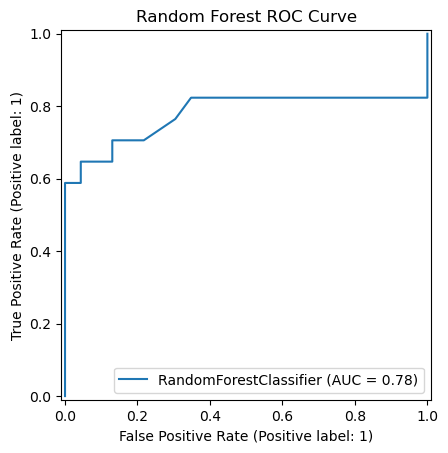

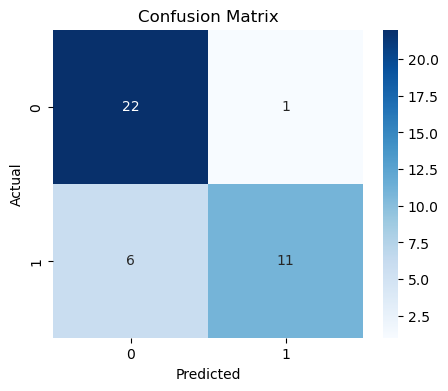

In [32]:
# Required imports for visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, RocCurveDisplay
import seaborn as sns

# -------------------------
# 1️⃣ Train/Test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# -------------------------
# 2️⃣ Predictions & metrics
# -------------------------
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", cm)

# -------------------------
# 3️⃣ ROC curve
# -------------------------
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("Random Forest ROC Curve")
plt.show()

# -------------------------
# 4️⃣ Confusion matrix heatmap
# -------------------------
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [33]:
for bit in top_indices:        # loop over top important fingerprint bits
    print(f"\n=== Bit {bit} ===")
    
    if bit in bit_info:         # check if RDKit tracked this bit
        for mol_idx, (atom_idx, radius) in bit_info[bit]:
            mol = Chem.MolFromSmiles(df['smiles'][mol_idx])
            if mol is None:
                continue
            print(f"Molecule {mol_idx} - Atom {atom_idx}, Radius {radius}")
            
            # Highlight the atom(s) in the molecule
            img = Draw.MolToImage(mol, highlightAtoms=[atom_idx], size=(300,300))
            display(img)
    else:
        print("Bit not found in any molecule")



=== Bit 289 ===
Bit not found in any molecule

=== Bit 578 ===
Bit not found in any molecule

=== Bit 745 ===
Bit not found in any molecule

=== Bit 408 ===
Bit not found in any molecule

=== Bit 807 ===
Bit not found in any molecule


In [34]:
# Find only bits that exist in bit_info
mapped_bits = [b for b in top_indices if b in bit_info]
print("Top bits that can be mapped:", mapped_bits)


Top bits that can be mapped: []


In [35]:
# Predict on test set
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Count predicted actives
n_active = np.sum(y_pred == 1)
n_inactive = np.sum(y_pred == 0)

print("Predicted active compounds:", n_active)
print("Predicted inactive compounds:", n_inactive)


Predicted active compounds: 12
Predicted inactive compounds: 28


In [36]:
df_test["predicted_prob"] = y_prob
df_test.sort_values("predicted_prob", ascending=False).head(10)


NameError: name 'df_test' is not defined

In [37]:
# =========================
# QSAR PIPELINE (COMPLETE)
# =========================

# 1️⃣ Imports
import pandas as pd
import numpy as np

from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# -------------------------
# 2️⃣ Load dataset
# -------------------------
df = pd.read_csv("data.csv")   # must contain 'smiles' and 'activity'

print("Dataset shape:", df.shape)
print(df.head())

# -------------------------
# 3️⃣ Generate Morgan fingerprints
# -------------------------
X = []

for smi in df["smiles"]:
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        arr = np.zeros(1024)
    else:
        fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(
            mol, radius=2, nBits=1024
        )
        arr = np.zeros((1024,), dtype=int)
        ConvertToNumpyArray(fp, arr)
    X.append(arr)

X = np.array(X)
y = df["activity"].values

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# -------------------------
# 4️⃣ Train / Test Split (WITH INDICES)
# -------------------------
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X,
    y,
    df.index,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# -------------------------
# 5️⃣ Train Random Forest
# -------------------------
clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
clf.fit(X_train, y_train)

# -------------------------
# 6️⃣ Evaluate model
# -------------------------
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------------
# 7️⃣ Create test-set DataFrame with predictions
# -------------------------
df_test = df.loc[idx_test].copy()
df_test["predicted_prob"] = y_prob
df_test["predicted_class"] = y_pred

# -------------------------
# 8️⃣ Top predicted actives
# -------------------------
top_actives = df_test.sort_values(
    "predicted_prob", ascending=False
).head(10)

print("\nTop predicted active compounds:")
print(top_actives[["smiles", "activity", "predicted_prob"]])

# -------------------------
# 9️⃣ How many compounds predicted active?
# -------------------------
n_predicted_active = (df_test["predicted_class"] == 1).sum()
print("\nNumber of compounds predicted ACTIVE:", n_predicted_active)


Dataset shape: (199, 2)
   activity                                             smiles
0         1  CC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@...
1         0      CCCc1c(OCCCOc2ccc(OCC(=O)O)cc2)ccc(C(C)=O)c1O
2         0  C=C(C)C(=O)OCC(O)COc1ccc(C(C)(C)c2ccc(OCC(O)CO...
3         0                               C=C(C)CS(=O)(=O)[O-]
4         1                     Cc1ccc2c(c1N)C(=O)c1ccccc1C2=O
Feature matrix shape: (199, 1024)
Target vector shape: (199,)


[12:59:58] DEPRECATION WARNING: please use MorganGenerator
[12:59:58] DEPRECATION WARNING: please use MorganGenerator
[12:59:58] DEPRECATION WARNING: please use MorganGenerator
[12:59:58] DEPRECATION WARNING: please use MorganGenerator
[12:59:58] DEPRECATION WARNING: please use MorganGenerator
[12:59:58] DEPRECATION WARNING: please use MorganGenerator
[12:59:58] DEPRECATION WARNING: please use MorganGenerator
[12:59:58] DEPRECATION WARNING: please use MorganGenerator
[12:59:58] DEPRECATION WARNING: please use MorganGenerator
[12:59:58] DEPRECATION WARNING: please use MorganGenerator
[12:59:58] DEPRECATION WARNING: please use MorganGenerator
[12:59:58] DEPRECATION WARNING: please use MorganGenerator
[12:59:58] DEPRECATION WARNING: please use MorganGenerator
[12:59:58] DEPRECATION WARNING: please use MorganGenerator
[12:59:58] DEPRECATION WARNING: please use MorganGenerator
[12:59:58] DEPRECATION WARNING: please use MorganGenerator
[12:59:58] DEPRECATION WARNING: please use MorganGenerat

Accuracy: 0.825
ROC-AUC: 0.7787723785166241
Confusion Matrix:
 [[22  1]
 [ 6 11]]

Top predicted active compounds:
                                                smiles  activity  \
73   CC(=O)Oc1ccc2c(c1)CC[C@@H]1[C@@H]2CC[C@]2(C)[C...         1   
7    CCCCCCCCCC(=O)O[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O...         1   
164  C[C@]12CC[C@@H]3[C@H]4CCC(=O)C=C4CC[C@H]3[C@@H...         1   
174  C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1C[C@...         1   
69                         CCCCC(CC)COC(=O)c1ccc(O)cc1         1   
175  C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc(OC5CCCC5)ccc4...         1   
114                          O=C(c1ccccc1)c1ccc(O)cc1O         1   
167                               Oc1ccc(Nc2ccccc2)cc1         1   
70                          CC(C)(c1ccccc1)c1ccc(O)cc1         1   
22   C[C@]12CCC(=O)C[C@@H]1CC[C@@H]1[C@@H]2CC[C@@]2...         1   

     predicted_prob  
73            0.980  
7             0.950  
164           0.935  
174           0.920  
69            0.895  
175 

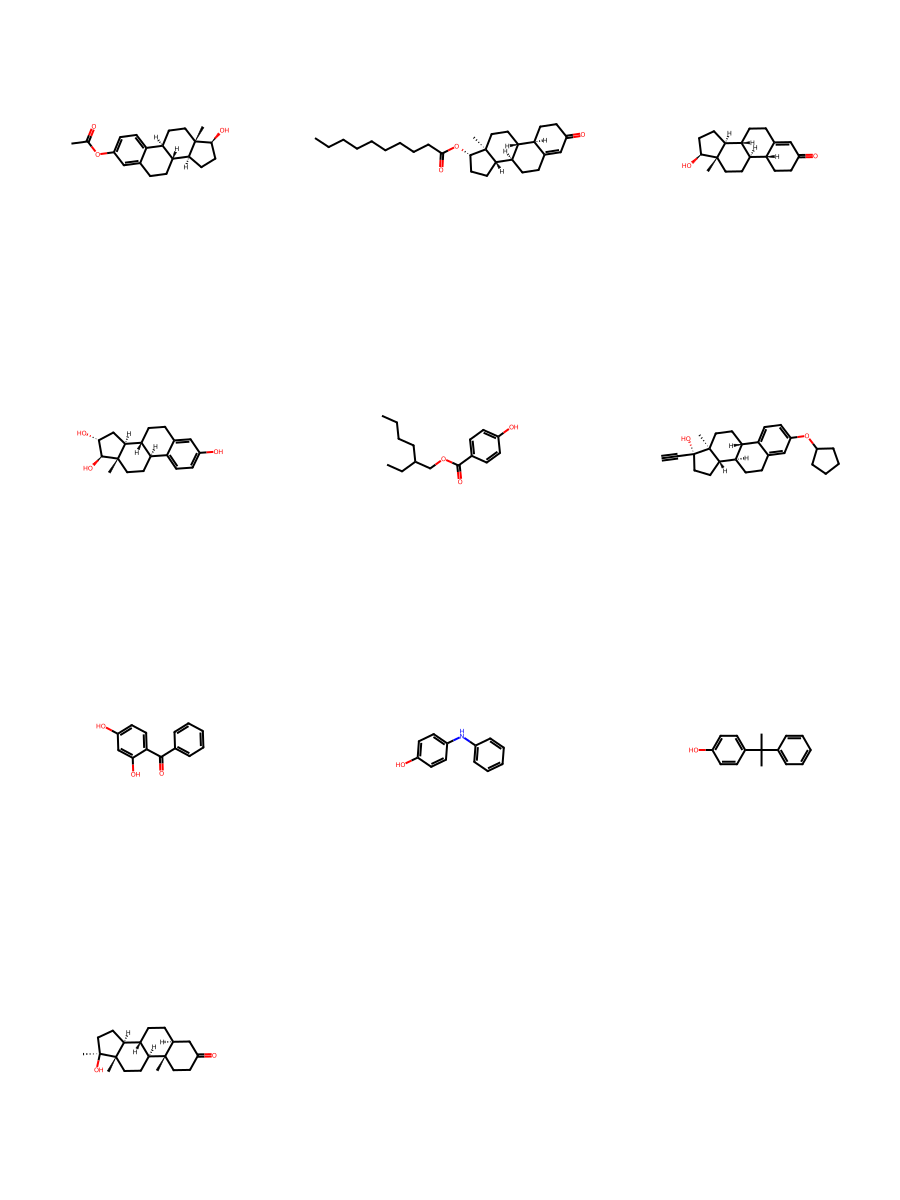

In [38]:
from rdkit import Chem
from rdkit.Chem import Draw

top_smiles = top_actives["smiles"].tolist()

mols = [Chem.MolFromSmiles(smi) for smi in top_smiles]
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300,300))


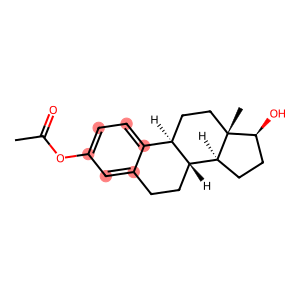

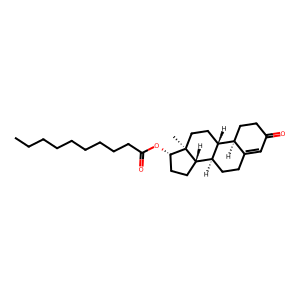

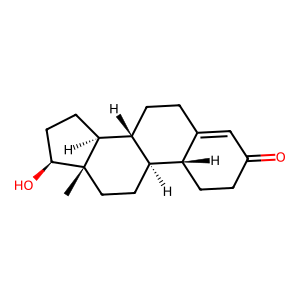

In [39]:
from rdkit.Chem import rdMolDescriptors

for smi in top_smiles[:3]:
    mol = Chem.MolFromSmiles(smi)
    aromatic_atoms = [a.GetIdx() for a in mol.GetAtoms() if a.GetIsAromatic()]
    display(Draw.MolToImage(mol, highlightAtoms=aromatic_atoms))


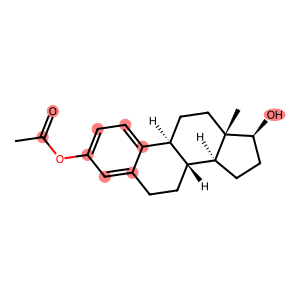

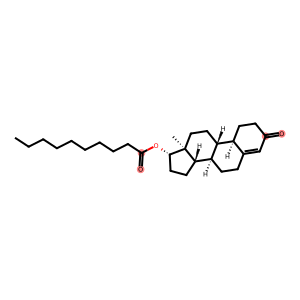

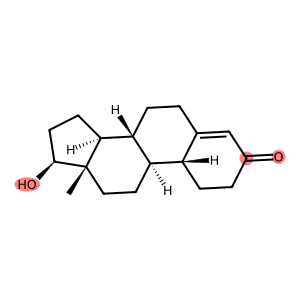

In [42]:
for smi in top_smiles[:3]:  # top 3 predicted compounds
    mol = Chem.MolFromSmiles(smi)
    
    highlight_atoms = set()
    
    # Aromatic
    highlight_atoms.update(a.GetIdx() for a in mol.GetAtoms() if a.GetIsAromatic())
    
    # Carbonyl
    for bond in mol.GetBonds():
        if bond.GetBondTypeAsDouble() == 2.0:
            a1, a2 = bond.GetBeginAtom(), bond.GetEndAtom()
            if {a1.GetSymbol(), a2.GetSymbol()} == {"C", "O"}:
                highlight_atoms.update([a1.GetIdx(), a2.GetIdx()])
    
    # H-bond donors
    highlight_atoms.update(
        a.GetIdx()
        for a in mol.GetAtoms()
        if a.GetSymbol() in ["O", "N"] and a.GetTotalNumHs() > 0
    )
    
    # Display molecule with highlights
    display(Draw.MolToImage(mol, highlightAtoms=list(highlight_atoms)))
